<a href="https://colab.research.google.com/github/lamortizme/Entrega3/blob/main/punto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

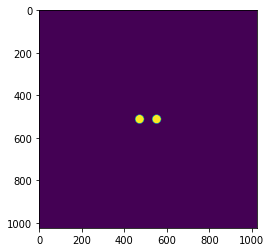

[[-5.55111512e-17  4.00000000e+01]
 [-2.50000000e-02  0.00000000e+00]]


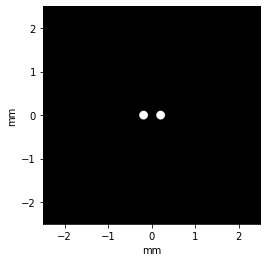

[[-5.55111512e-17  1.60000000e+02]
 [-6.25000000e-03  0.00000000e+00]]
[[-5.55111512e-17  1.60000000e+02]
 [-6.25000000e-03  0.00000000e+00]]


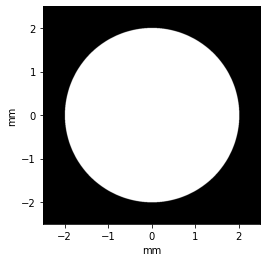

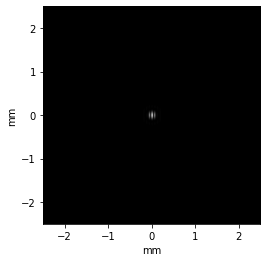

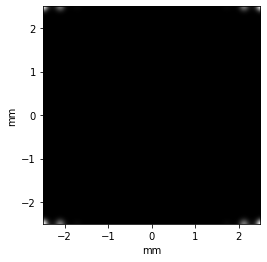

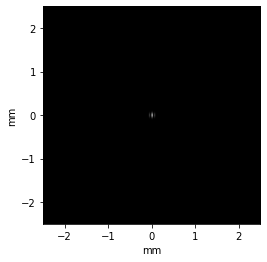

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 10 17:48:47 2021

@author: san
"""
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 

#%%
#se definen la máscaras
def cmask(a,b,radius,N):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask = (t)**2 + (s)**2 <= radius*radius
  array = np.zeros((N,N))
  array[mask] = 1.
  return array

def icmask(a,b,radius,N):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask = (t)**2 + (s)**2 <= radius*radius
  array = np.ones((N,N))
  array[mask] = 0.
  return array

def ccmask(a,b,radius,N,centrox,centroy):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask = (t-centrox)**2 + (s-centroy)**2 <= radius*radius
  array = np.zeros((N,N))
  array[mask] = 1.
  return array


#%%
wl= 633e-6 #longitud de onda 
L=5#medida en milimetros del objeto
N= 1024 #numero de particiones del objeto
dx= L/N #tamaño de particiones del objeto
nf=5 #número de Fresnel
k=(2*np.pi)/wl
df=1/(N*dx)

def FS(z):
 FS=[[1,z],[0,1]]
 return FS

def lens(f):
    Len=[[1,0],[-1/f ,1]]
    return Len
                                                    
                                                     
def collins(z,u,M,dx):
    global df
    hh= np.zeros((N,N))*np.exp(-1j*0)
    Ut= np.zeros((N,N))*np.exp(-1j*0)
    Utt= np.zeros((N,N))*np.exp(-1j*0)
    print(M)
    A=M[0][0]
    B=M[0][1]
    C=M[1][0]
    D=M[1][1]
    df=dx*B
    for t in range(0,N):
        for s in range(0,N):
            h= np.exp(1j*k*A*(dx**2)*((t-int(N/2))**2 + (s-int(N/2))**2)/(2*B))
            hh[t,s]=h 
            Ut[t,s]=u[t,s]*h
   
    Utf=np.fft.fft2(Ut) 
    for t in range(0,N):
        for s in range(0,N):

            h2=1j*np.exp(1j*k*z)*np.exp(1j*D*k*((t**2)+(s**2))/(2*B))/(B*wl)
            Utt[t,s]=h2*Utf[t,s]
    
    #hh=np.fft.fftshift(hh)                         
    return Utt
 
def igraph(Si,dx):  
    plt.figure(figsize=(7,4))
    plt.axis([-dx*N/2, dx*N/2,-dx*N/2,dx*N/2])
    plt.imshow(np.angle(Si),cmap='gray',extent=(-dx*N/2,dx*N/2,-dx*N/2,dx*N/2))
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()

def graph(S,d):    
    plt.figure(figsize=(7,4))
    plt.axis([-dx*N/2, dx*N/2,-dx*N/2,dx*N/2])
    plt.imshow((S),cmap='gray',extent=(-d*N/2,d*N/2,-d*N/2,d*N/2))
    #plt.xlim=(-dx*N/2,dx*N/2)
    #plt.ylim=(-dx*N/2,dx*N/2)
    plt.ylabel('mm')
    plt.xlabel('mm')
    plt.show()
    
#%%    definir matrices 

M=np.dot(lens(40),FS(40))
M=np.dot(FS(40),M)

r=0.05
radio = 0.1

ut=ccmask(int(N/2),int(N/2),radio/dx,N,0,40)+ccmask(int(N/2),int(N/2),radio/dx,N,0,-40)
plt.imshow(ut)
plt.show()


U=collins(8,ut,M,dx) 
U=np.fft.fftshift(U)
UU=abs(U*U)
graph(ut,dx)

#%% espacio para la propagación despues del diagragma de apertura 
rd= 80
diaf=cmask(int(N/2),int(N/2),rd/df,N)#*np.exp(1j*0)
Ut=UU*diaf
Ut=abs(Ut*Ut)
M2=np.dot(lens(160),FS(160))
M2=np.dot(FS(160),M2)
print(M2)
U2=collins(36,Ut,M2,dx)
#U2=np.fft.fftshift(U2)
UU2=abs(U2*U2)
graph(diaf,dx) 
graph(UU,dx)   
graph(UU2,dx)
graph(Ut,dx)
